-------------------------
 CBO 


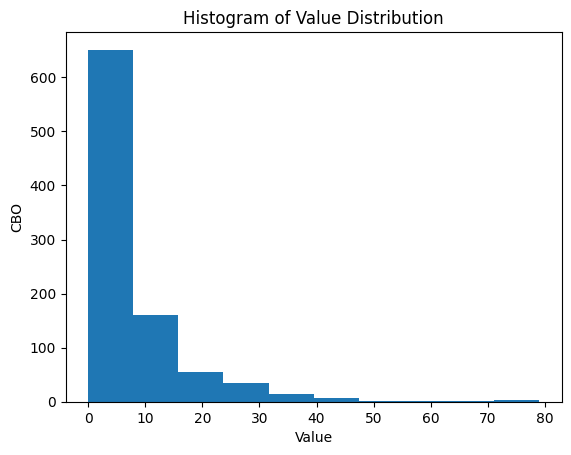

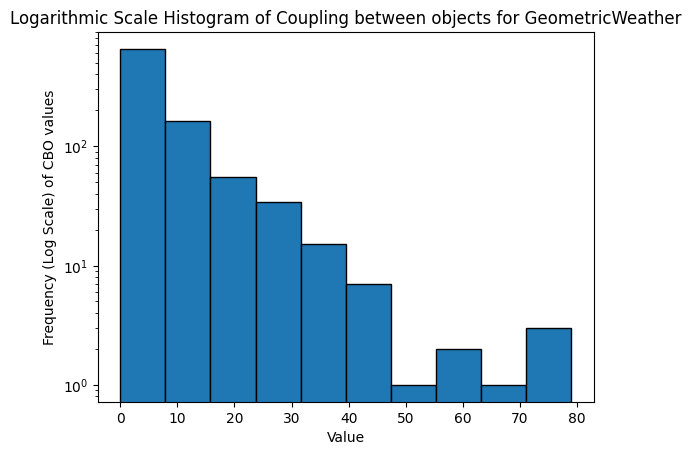

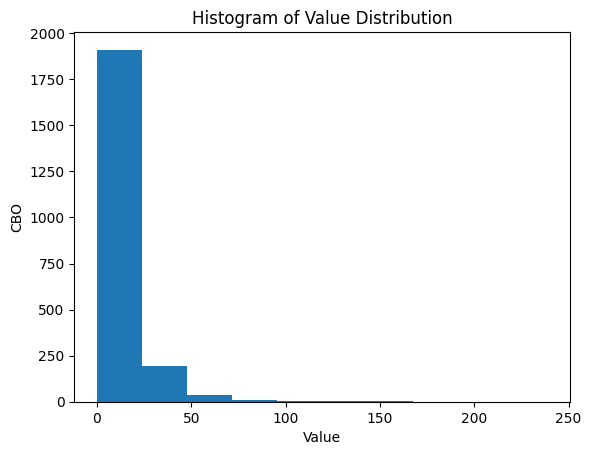

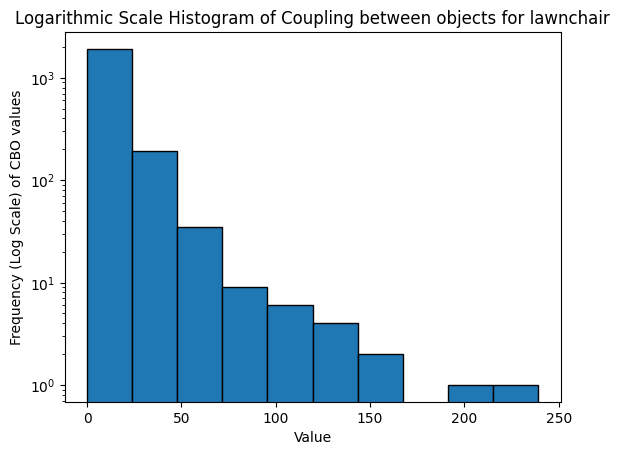

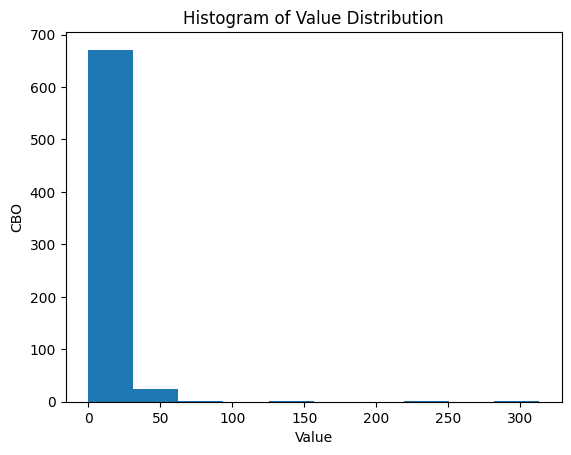

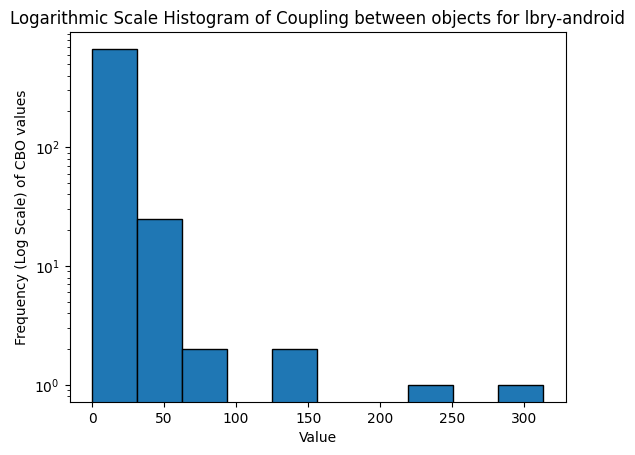

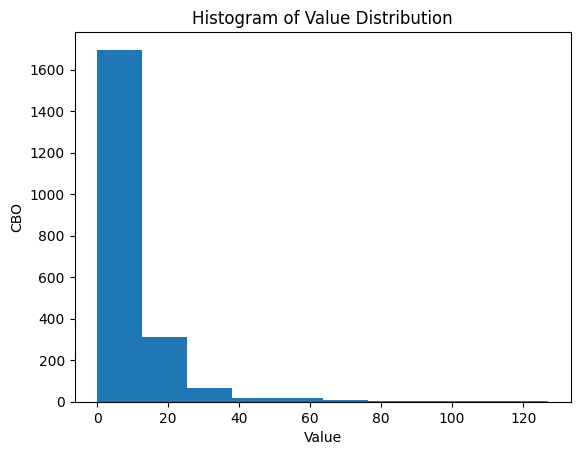

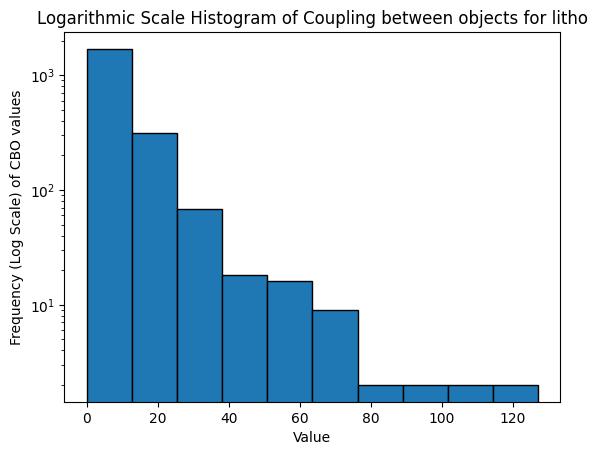

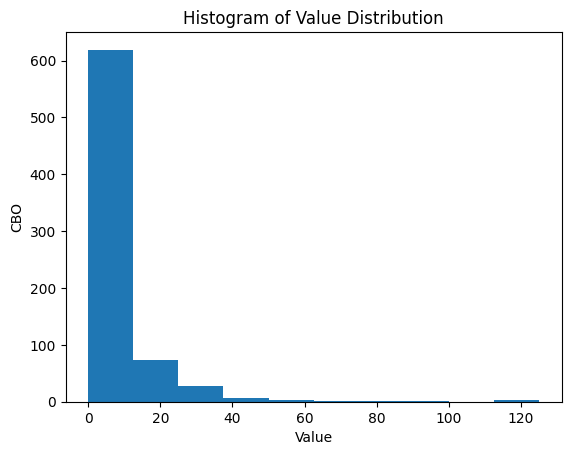

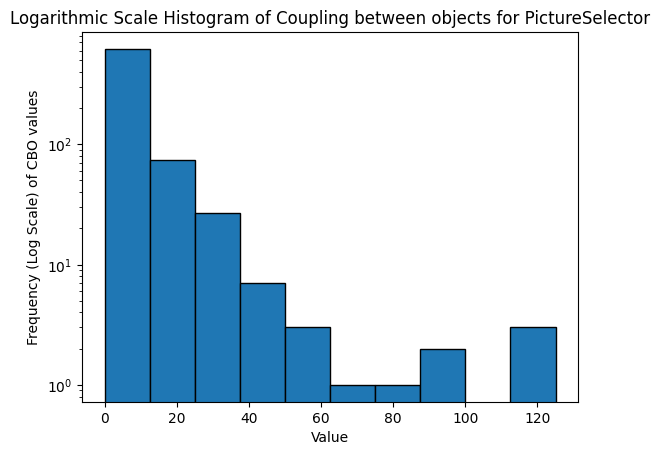

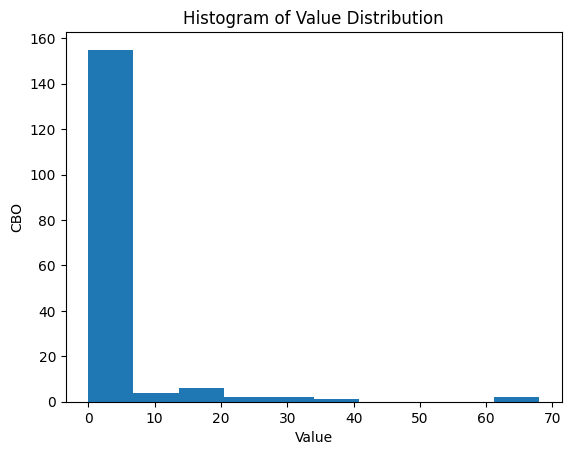

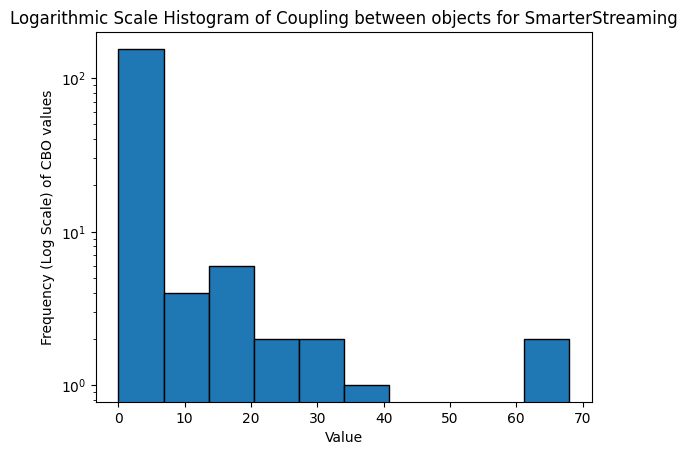

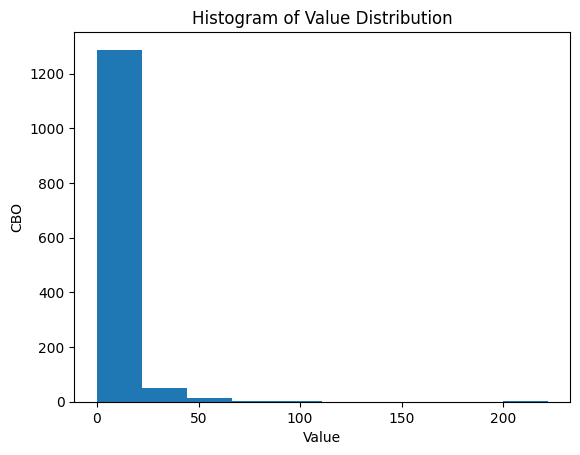

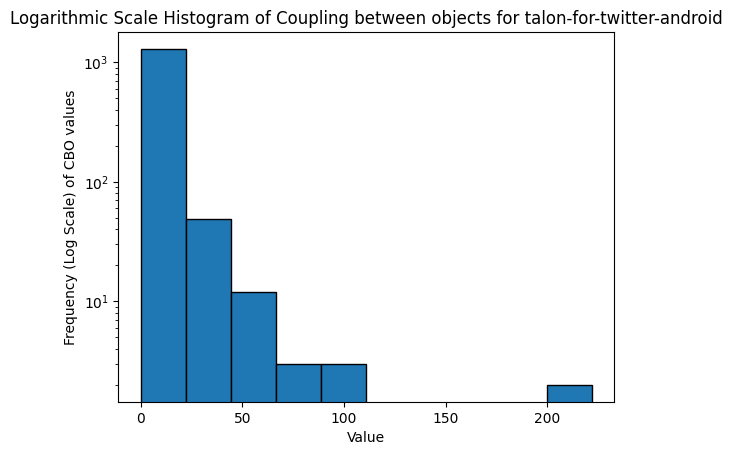

-------------------------
 NOC 


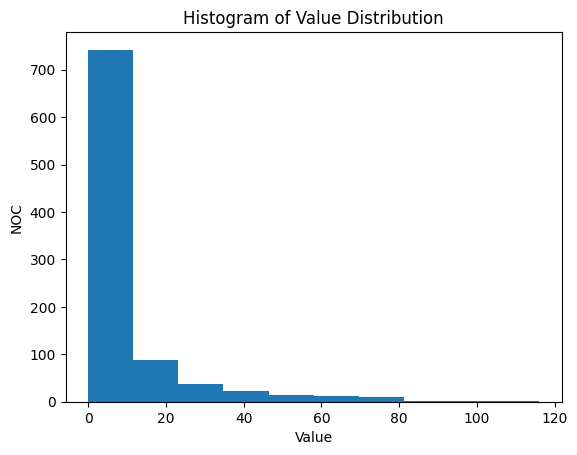

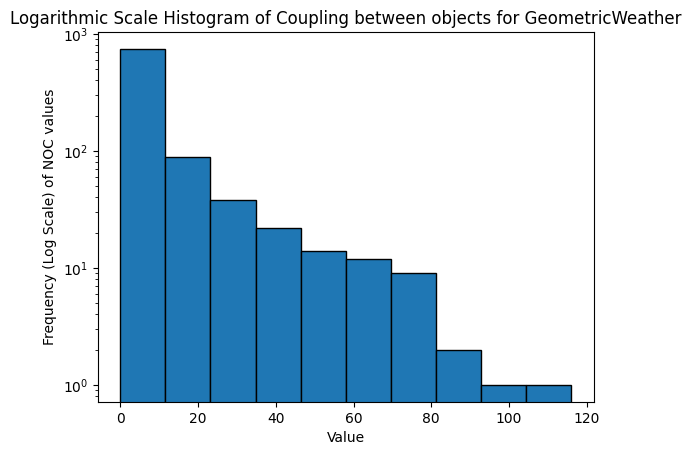

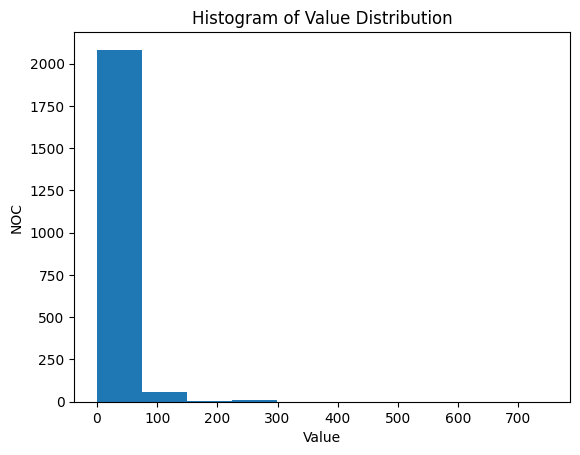

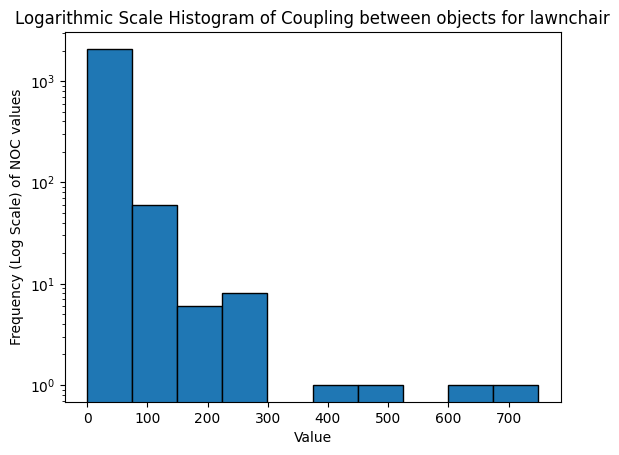

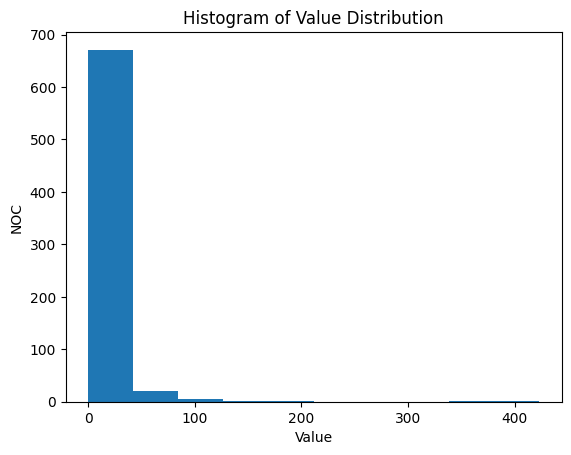

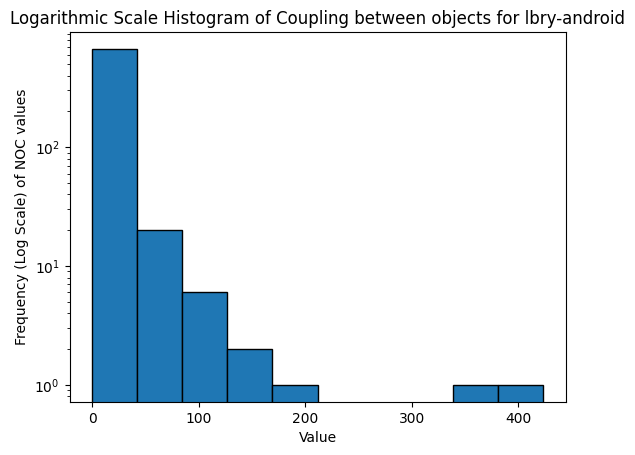

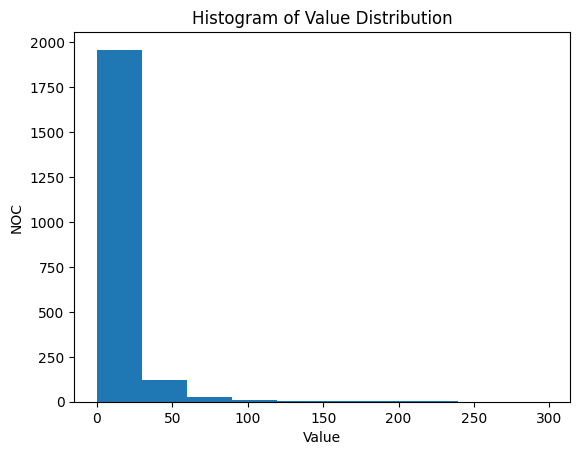

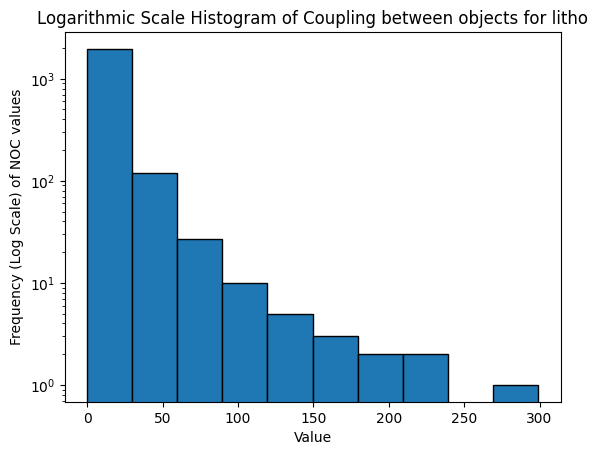

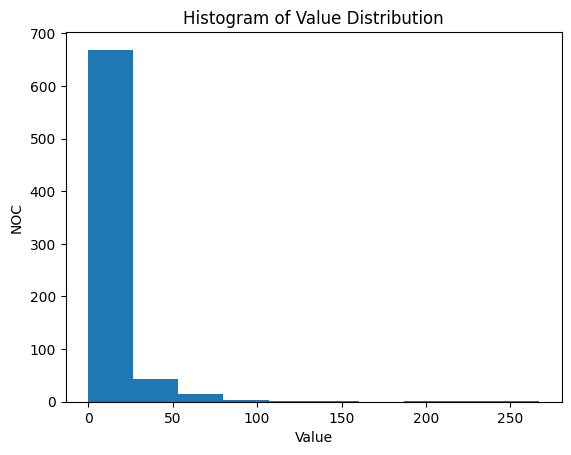

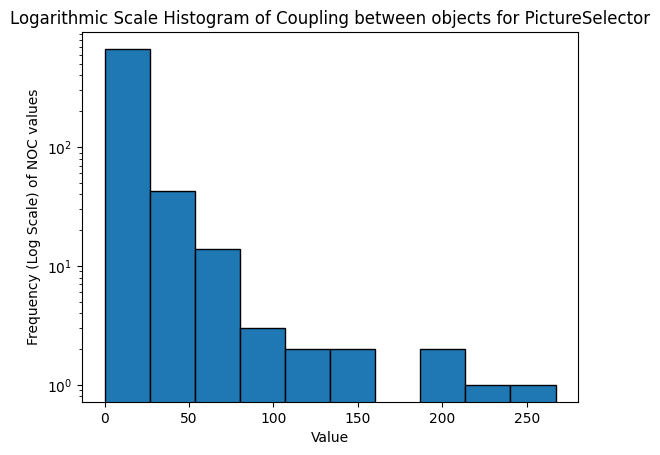

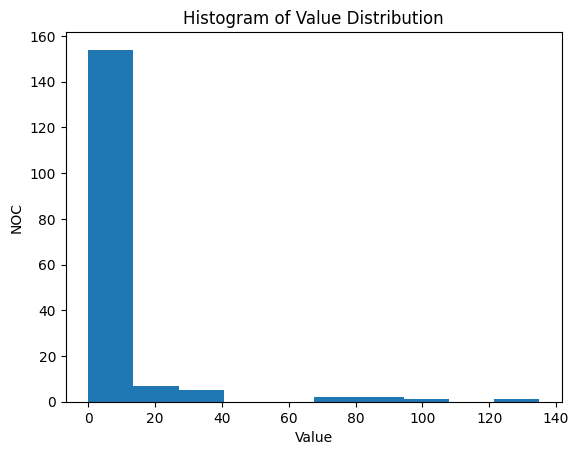

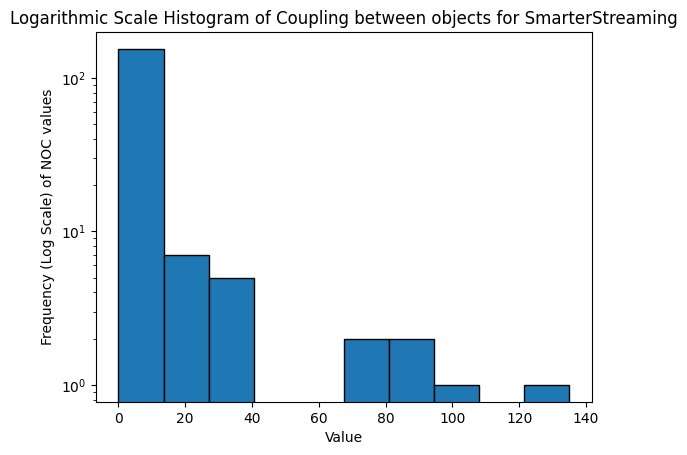

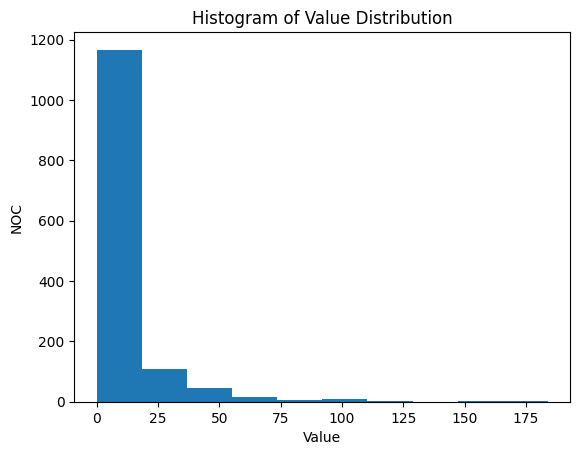

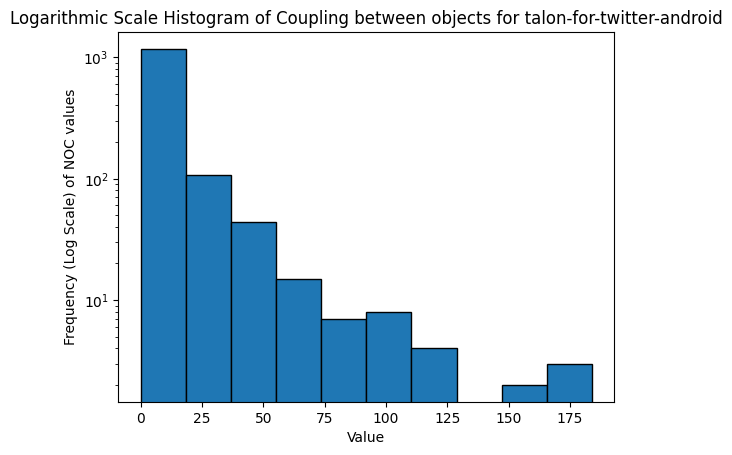

In [48]:
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt



# line chart
def line_chart(label:str, entity:str, data:list):
    """
    Plots a line chart for the entered data. 

    Parameters:
    entity (str): The character whose sentiment is being analyzed.
    data (list): List of sentiment scores corresponding to each chapter.

    This function creates a line chart with number of classes on the x-axis and value in data list the y-axis, 
    """

    plt.figure(figsize=(25, 10))
    plt.plot(list(range(len(data))) , data, marker='o', linestyle='-', color='b')
    plt.title(f'Value of {entity} per class')
    plt.xlabel('Class')
    plt.ylabel(f'{label}')
    plt.grid(True)
    
    # Setting axis limits
    plt.xlim(left=0)  # Adjust as necessary to cut off empty initial values

    
    plt.show()
    
    
# # line chart for two characters 
# def double_line_chart(entity1, entity2, data1, data2):
#     """
#     Plots a line chart comparing the sentiments of two entities over time.
# 
#     Parameters:
#     entity1 (str): The first character for comparison.
#     entity2 (str): The second character for comparison.
#     data1 (list): List of sentiment scores for the first entity corresponding to each chapter.
#     data2 (list): List of sentiment scores for the second entity corresponding to each chapter.
# 
#     This function creates a comparative line chart for two entities, showing their sentiment trends across chapters.
#     """
#     plt.figure(figsize=(25, 10))
#     
#     plt.plot(chapters, data1, marker='o', color='blue', label=entity1)
#     plt.plot(chapters, data2, marker='s', color='green', label=entity2)
# 
#     plt.title(f'Sentiment of {entity1} vs {entity2} Over Time')
#     plt.xlabel('Chapter')
#     plt.ylabel('Data Value')
#     plt.legend()
#     plt.show()
    

   
def histogram(label, entity, data):
        # Creating a histogram
    plt.hist(data)
    plt.xlabel('Value')
    plt.ylabel(f'{label}')
    plt.ylabel(f'{entity}')
    plt.title('Histogram of Value Distribution')
    plt.show()
        
def log_histogram(label, entity, data):

    plt.hist(data, log=True, edgecolor='black')
    plt.title(f"Logarithmic Scale Histogram of {label}")
    plt.xlabel("Value")
    plt.ylabel(f"Frequency (Log Scale) of {entity} values")
    plt.show()

        
def boxplot(entity, data):
    sns.boxplot(data=data)
    plt.title(f"Box Plot of {entity}")
    plt.show()
    

def data_prep(metric_index:int, requested_projects=None):
    """
    Prepare and fetch data for visualization.
    """
    
    projects = ["GeometricWeather", "lawnchair", "lbry-android", "litho", "PictureSelector", "SmarterStreaming", "talon-for-twitter-android"]
    project_paths: list[str] = []
    
    if requested_projects is not None:
        projects = requested_projects
    
    absolute_path = os.path.abspath(os.getcwd())
    
    data = {}

    for project in projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
    
         
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                if len(row) > metric_index:
                    data_list.append(int(row[metric_index]))
                    
        data[project] = data_list
        #print(data_list)
        
    return data

#CBO, coupling between objects
metric = "CBO"
data_all_projects = data_prep(4)
print(f"-------------------------\n {metric} \n")
for p in data_all_projects:
    #line_chart(f"Coupling between objects for {project}",  f"{metric}", data[p])
    histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    log_histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    #boxplot( f"{metric}", data_all_projects[p])


#NOC, number of children
metric = "NOC"
data_all_projects = data_prep(10)
print(f"-------------------------\n {metric} \n")
for p in data_all_projects:
    #line_chart(f"Coupling between objects for {project}",  f"{metric}", data[p])
    histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    log_histogram(f"Coupling between objects for {p}", f"{metric}", data_all_projects[p])
    #boxplot( f"{metric}", data_all_projects[p])
    
    

    
